### Importacion de las librerias

In [1]:
# Procesamiento de datos
import numpy as np
import pandas as pd
from sklearn import utils
from sklearn.decomposition import PCA
from sklearn import preprocessing as prp
from tensorflow.keras import layers
from sklearn.impute import SimpleImputer

# Graficadores
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

#Otros
!pip install category_encoders
from category_encoders import TargetEncoder

### Lectura del DataFrame

In [2]:
# !pip install pyreadstat
# import pyreadstat
# sav, meta = pyreadstat.read_sav('/content/drive/MyDrive/DataSets/Dataset PSY-COVID (recode). BBDD General 3.0.sav')

# sav.to_csv('/content/drive/MyDrive/DataSets/PSY-COVID-RAW_NEW.csv')

In [3]:
df = pd.read_csv('/content/drive/MyDrive/DataSets/PSY-COVID-RAW_NEW.csv')
print(df.columns)
print(df.shape)
df.head()

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/DataSets/PSY-COVID-RAW_NEW.csv'

### Identificacion de las columnas con datos faltantes

In [ ]:
unique_counts = df.nunique()
pd.DataFrame(unique_counts)

In [ ]:
df = df.drop(['Unnamed: 0','Database','Time','Language','Consent','Zip_Code','Form_Channel'],axis=1)

In [ ]:
df.info()

null = df.isnull().sum()
pd.DataFrame(null)

In [ ]:
df['Trust_6'].value_counts()
# De 32442 Faltan 32257?
df = df.drop(['Trust_6'],axis=1)

In [ ]:
df['Life_Change_1'].value_counts()
# Equivalente a:
# Mucho peor = -2
# Algo peor = -1
# Igual = 0
# Algo mejor = 1
# Mucho mejor = 2


### Imputacion de los datos

In [ ]:
cols_with_nan = df.columns[df.isna().any()].tolist()
print(cols_with_nan)

In [ ]:
to_imputate = cols_with_nan
for value in to_imputate:
  imputer = SimpleImputer(strategy='most_frequent')
  imputed = pd.DataFrame(imputer.fit_transform(df))
  imputed.columns = df.columns
  df = imputed


In [ ]:
pd.set_option('display.max_columns', None)
df.info()

null = df.isnull().sum()
pd.DataFrame(null)

In [ ]:
df[df.drop(['Node'],axis=1).columns].astype(float)

### Busqueda de filas repetidas

In [ ]:
# Determinar si hay filas duplicadas en df
hay_duplicados = df.duplicated().any()

# Imprimir el resultado
if hay_duplicados:
    print("Hay filas duplicadas en el DataFrame.")
else:
    print("No hay filas duplicadas en el DataFrame.")

In [ ]:
# Determinar cuántas filas duplicadas hay en df
numero_duplicados = df.duplicated().sum()

# Imprimir el resultado
if numero_duplicados > 0:
    print(f"Hay {numero_duplicados} filas duplicadas en el DataFrame.")
else:
    print("No hay filas duplicadas en el DataFrame.")

### EDA

In [ ]:
plt.figure(figsize=(30,100))

i = 1
for column in df:
  plt.subplot(42,3,i)
  if column == 'Node':
    plt.violinplot(df[column].value_counts(),vert=False)
  else:
    plt.violinplot(df[column].tolist(),vert=False)

  plt.title(column)
  i+=1
plt.tight_layout()
plt.show()

In [ ]:
print(df['Node'].value_counts())
df['Node'].value_counts().plot(kind='bar')

In [ ]:
#No trunkated
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
print(df.describe().T)

In [ ]:
for column in df:
  print(f'Columna: {column}, Valores: {df[column].unique()} \n')

### Eliminacion de las filas repetidas

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
# Determinar si hay filas duplicadas en df
hay_duplicados = df.duplicated().any()

# Imprimir el resultado
if hay_duplicados:
    print("Hay filas duplicadas en el DataFrame.")
else:
    print("No hay filas duplicadas en el DataFrame.")

### Identificacion de la variable objetivo

In [4]:
df_label = pd.read_csv('conductual_crecimiento_OK.csv')
df_label['score_life_change'] = df_label.iloc[:, 0:9].sum(axis=1)
df_label['score_growth'] = df_label.iloc[:, 9:14].sum(axis=1)
df_label.head()

,Life_Change_1,Life_Change_2,Life_Change_3,Life_Change_4,Life_Change_5,Life_Change_6,Life_Change_7,Life_Change_8,Life_Change_9,Growth_1,Growth_2,Growth_3,Growth_4,Growth_5,score_life_change,score_growth
0,-2.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,1.0,3.0,3.0,3.0,2.0,3.0,2.0,14.0
1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,3.0,3.0,3.0,18.0,15.0
2,-1.0,0.0,2.0,0.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,2.0,2.0,3.0,3.0,0.0,11.0
3,2.0,0.0,2.0,2.0,1.0,2.0,0.0,0.0,1.0,1.0,2.0,2.0,1.0,3.0,10.0,9.0
4,0.0,-1.0,2.0,0.0,0.0,2.0,2.0,1.0,1.0,1.0,2.0,3.0,3.0,3.0,7.0,12.0


Text(0.5, 1.0, 'Distribución de scores de "CAMBIOS CONDUCTUALES"')

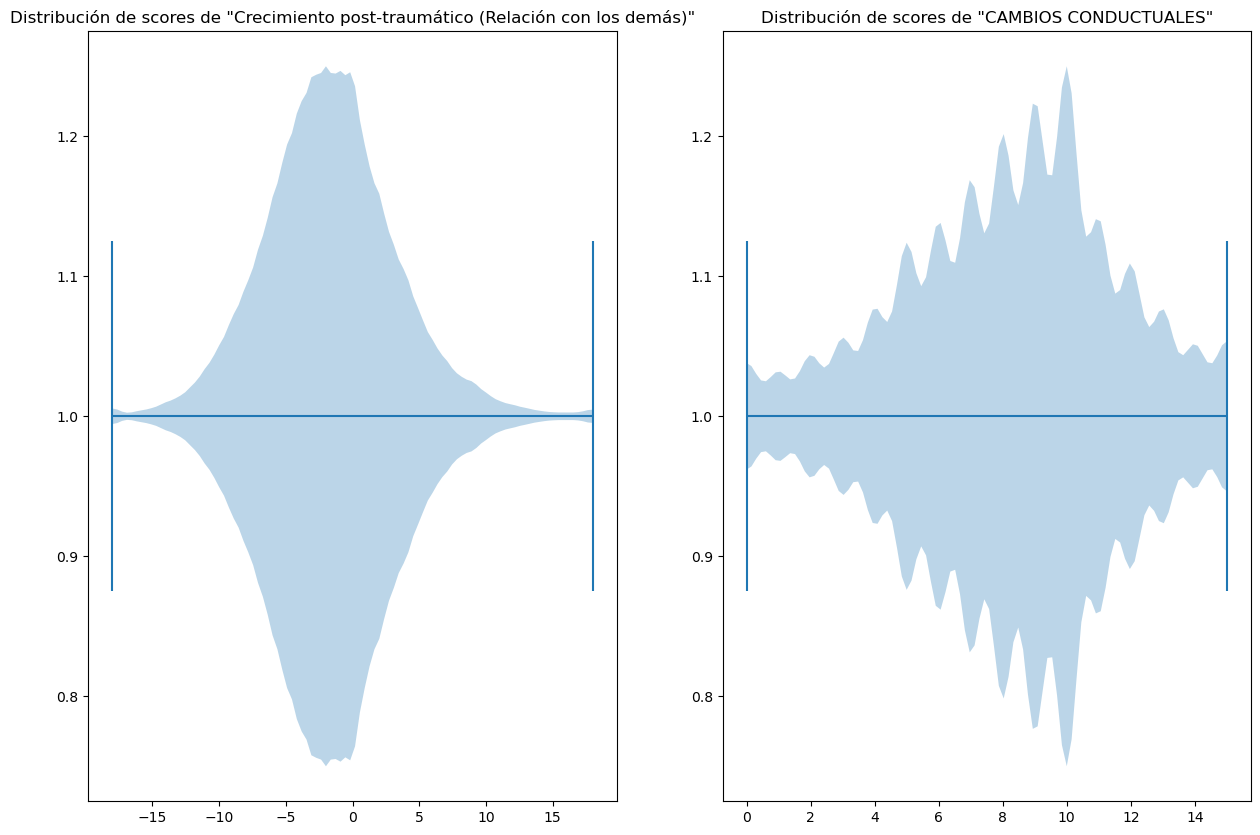

In [5]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.violinplot(df_label['score_life_change'],vert=False)
plt.title('Distribución de scores de "Crecimiento post-traumático (Relación con los demás)"')

plt.subplot(1,2,2)
plt.violinplot(df_label['score_growth'],vert=False)
plt.title('Distribución de scores de "CAMBIOS CONDUCTUALES"')

{'bodies': [<matplotlib.collections.PolyCollection at 0x280af13d5e0>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x280af13d640>,
 'cmins': <matplotlib.collections.LineCollection at 0x280af13dd90>,
 'cbars': <matplotlib.collections.LineCollection at 0x280af14c190>}

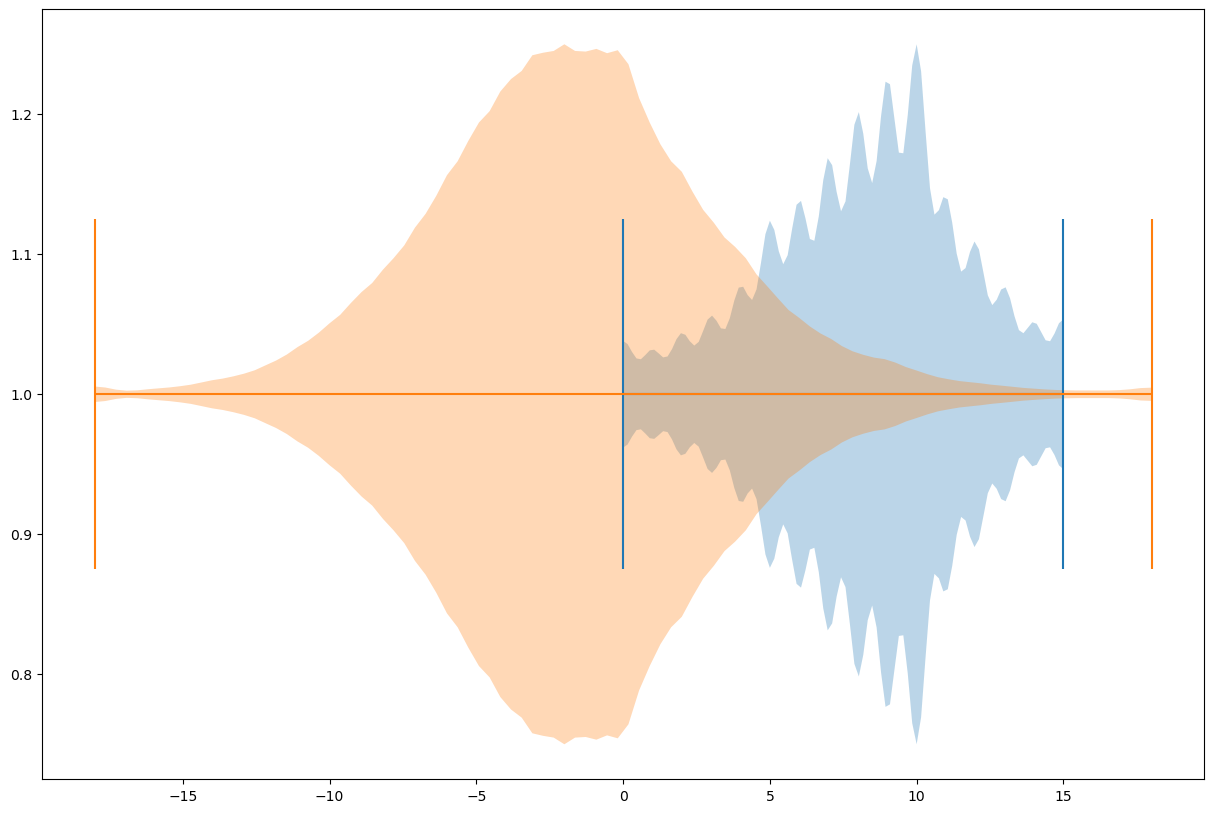

In [6]:
plt.figure(figsize=(15,10))
plt.violinplot(df_label['score_growth'],vert=False)
plt.violinplot(df_label['score_life_change'],vert=False)

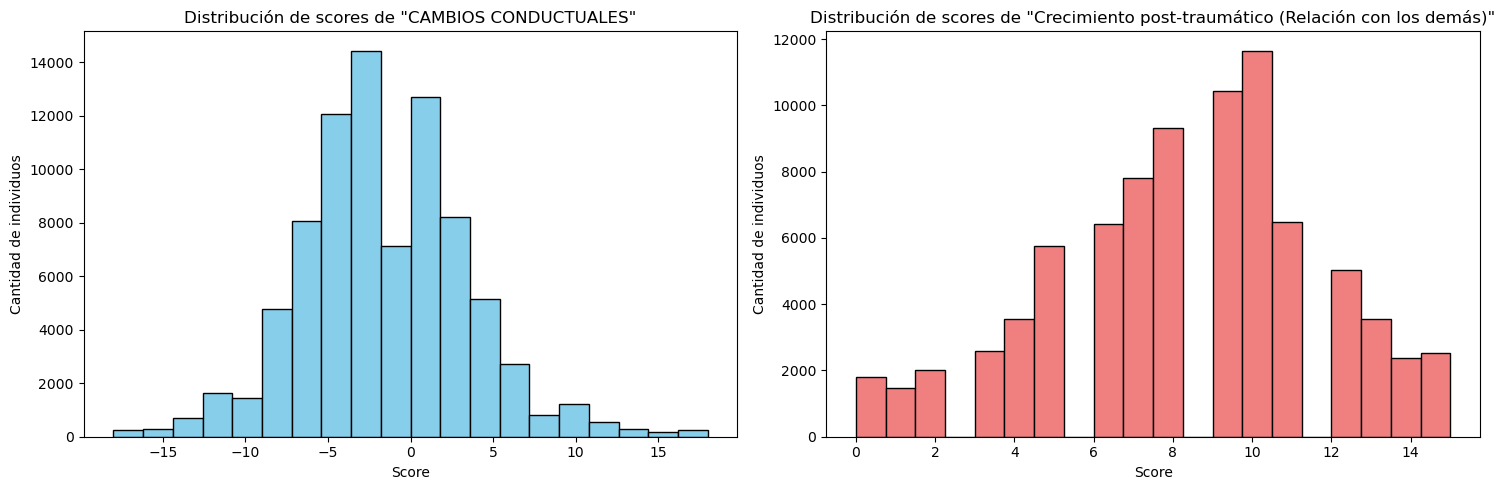

In [7]:
# Visualizar las distribuciones de los scores
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Distribución de "CAMBIOS CONDUCTUALES"
ax[0].hist(df_label['score_life_change'], bins=20, color='skyblue', edgecolor='black')
ax[0].set_title('Distribución de scores de "CAMBIOS CONDUCTUALES"')
ax[0].set_xlabel('Score')
ax[0].set_ylabel('Cantidad de individuos')

# Distribución de "Crecimiento post-traumático (Relación con los demás)" - Corregido
ax[1].hist(df_label['score_growth'], bins=20, color='lightcoral', edgecolor='black')
ax[1].set_title('Distribución de scores de "Crecimiento post-traumático (Relación con los demás)"')
ax[1].set_xlabel('Score')
ax[1].set_ylabel('Cantidad de individuos')

plt.tight_layout()
plt.show()

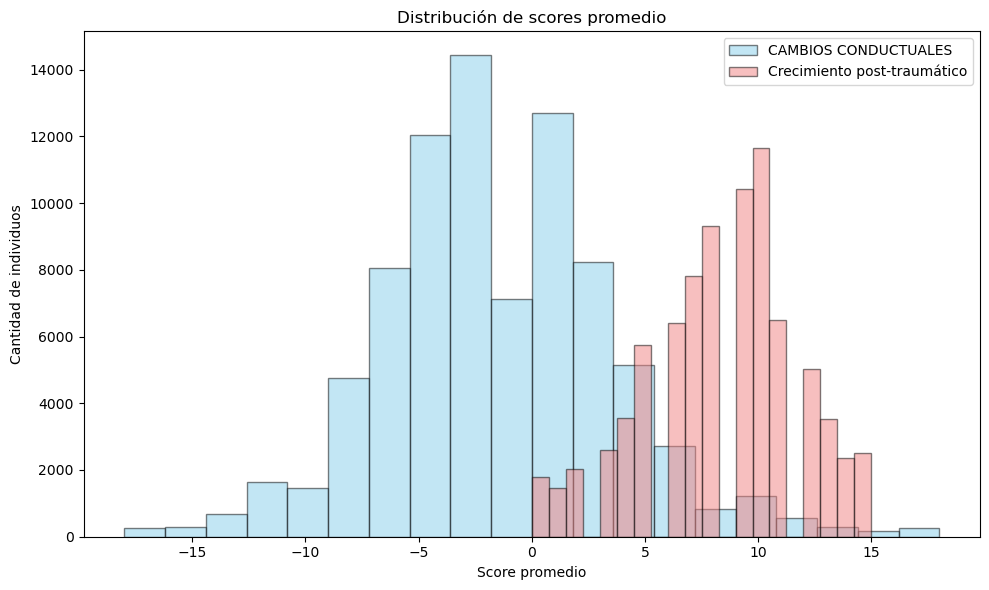

In [8]:
# Crear la gráfica de distribución de ambos scores promedio
plt.figure(figsize=(10, 6))

# Distribución de "CAMBIOS CONDUCTUALES"
plt.hist(df_label['score_life_change'], bins=20, color='skyblue', edgecolor='black', alpha=0.5, label='CAMBIOS CONDUCTUALES')

# Distribución de "Crecimiento post-traumático (Relación con los demás)"
plt.hist(df_label['score_growth'], bins=20, color='lightcoral', edgecolor='black', alpha=0.5, label='Crecimiento post-traumático')

plt.title('Distribución de scores promedio')
plt.xlabel('Score promedio')
plt.ylabel('Cantidad de individuos')
plt.legend()
plt.tight_layout()
plt.show()

### Creacion de la variable objetivo

In [9]:
transform = prp.MinMaxScaler(feature_range=(-1,1))#82
# transform = prp.RobustScaler(with_scaling=True)
# transform = prp.StandardScaler()
# transform = prp.QuantileTransformer(output_distribution='normal')
colums = transform.fit_transform(df_label['score_life_change'].values.reshape(-1,1))
df_label['score_life_change_MinMax'] = pd.DataFrame(colums)
df_label.head()

,Life_Change_1,Life_Change_2,Life_Change_3,Life_Change_4,Life_Change_5,Life_Change_6,Life_Change_7,Life_Change_8,Life_Change_9,Growth_1,Growth_2,Growth_3,Growth_4,Growth_5,score_life_change,score_growth,score_life_change_MinMax
0,-2.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,1.0,3.0,3.0,3.0,2.0,3.0,2.0,14.0,0.111111
1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,3.0,3.0,3.0,18.0,15.0,1.000000
2,-1.0,0.0,2.0,0.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,2.0,2.0,3.0,3.0,0.0,11.0,0.000000
3,2.0,0.0,2.0,2.0,1.0,2.0,0.0,0.0,1.0,1.0,2.0,2.0,1.0,3.0,10.0,9.0,0.555556
4,0.0,-1.0,2.0,0.0,0.0,2.0,2.0,1.0,1.0,1.0,2.0,3.0,3.0,3.0,7.0,12.0,0.388889


In [10]:
transform = prp.MinMaxScaler(feature_range=(0,1))#82
colums = transform.fit_transform(df_label['score_growth'].values.reshape(-1,1))
df_label['score_growth_MinMax'] = pd.DataFrame(colums)
df_label.columns = df_label.columns
df_label.head()

,Life_Change_1,Life_Change_2,Life_Change_3,Life_Change_4,Life_Change_5,Life_Change_6,Life_Change_7,Life_Change_8,Life_Change_9,Growth_1,Growth_2,Growth_3,Growth_4,Growth_5,score_life_change,score_growth,score_life_change_MinMax,score_growth_MinMax
0,-2.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,1.0,3.0,3.0,3.0,2.0,3.0,2.0,14.0,0.111111,0.933333
1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,3.0,3.0,3.0,18.0,15.0,1.000000,1.000000
2,-1.0,0.0,2.0,0.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,2.0,2.0,3.0,3.0,0.0,11.0,0.000000,0.733333
3,2.0,0.0,2.0,2.0,1.0,2.0,0.0,0.0,1.0,1.0,2.0,2.0,1.0,3.0,10.0,9.0,0.555556,0.600000
4,0.0,-1.0,2.0,0.0,0.0,2.0,2.0,1.0,1.0,1.0,2.0,3.0,3.0,3.0,7.0,12.0,0.388889,0.800000


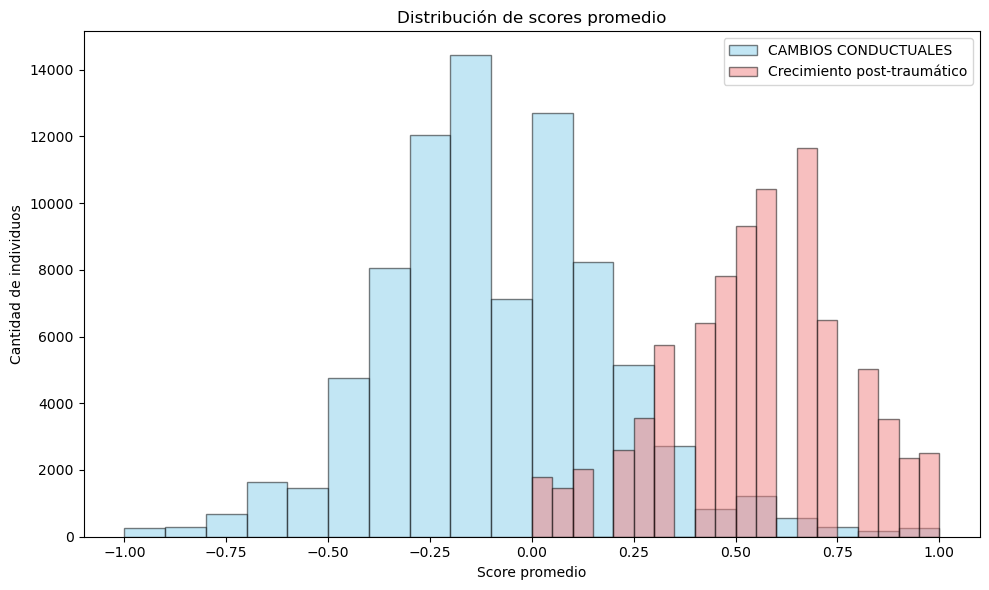

In [11]:
# Crear la gráfica de distribución de ambos scores promedio
plt.figure(figsize=(10, 6))

# Distribución de "CAMBIOS CONDUCTUALES"
plt.hist(df_label['score_life_change_MinMax'], bins=20, color='skyblue', edgecolor='black', alpha=0.5, label='CAMBIOS CONDUCTUALES')

# Distribución de "Crecimiento post-traumático (Relación con los demás)"
plt.hist(df_label['score_growth_MinMax'], bins=20, color='lightcoral', edgecolor='black', alpha=0.5, label='Crecimiento post-traumático')

plt.title('Distribución de scores promedio')
plt.xlabel('Score promedio')
plt.ylabel('Cantidad de individuos')
plt.legend()
plt.tight_layout()
plt.show()

In [12]:
df_label['SUMA'] = df_label['score_life_change_MinMax'] + df_label['score_growth_MinMax']
df_label['Label_1'] = df_label['SUMA'].apply(lambda x: -1 if x < 0 else (0 if x <= 0.33 else 1))
df_label.head()

,Life_Change_1,Life_Change_2,Life_Change_3,Life_Change_4,Life_Change_5,Life_Change_6,Life_Change_7,Life_Change_8,Life_Change_9,Growth_1,Growth_2,Growth_3,Growth_4,Growth_5,score_life_change,score_growth,score_life_change_MinMax,score_growth_MinMax,SUMA,Label_1
0,-2.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,1.0,3.0,3.0,3.0,2.0,3.0,2.0,14.0,0.111111,0.933333,1.044444,1
1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,3.0,3.0,3.0,18.0,15.0,1.000000,1.000000,2.000000,1
2,-1.0,0.0,2.0,0.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,2.0,2.0,3.0,3.0,0.0,11.0,0.000000,0.733333,0.733333,1
3,2.0,0.0,2.0,2.0,1.0,2.0,0.0,0.0,1.0,1.0,2.0,2.0,1.0,3.0,10.0,9.0,0.555556,0.600000,1.155556,1
4,0.0,-1.0,2.0,0.0,0.0,2.0,2.0,1.0,1.0,1.0,2.0,3.0,3.0,3.0,7.0,12.0,0.388889,0.800000,1.188889,1


C:\Users\Private Richi\anaconda3\envs\DL\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


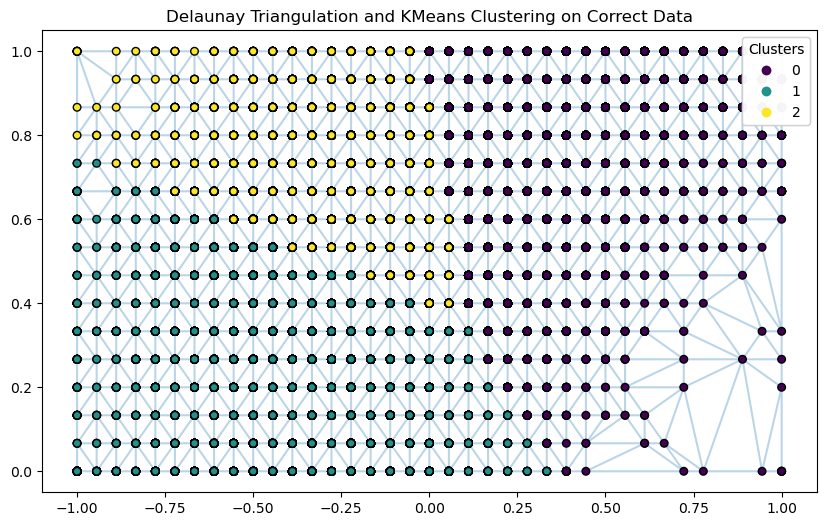

In [13]:
from sklearn.cluster import KMeans
from scipy.spatial import Delaunay

points_correct = df_label[['score_life_change_MinMax', 'score_growth_MinMax']].values

# Apply KMeans clustering
kmeans_correct = KMeans(n_clusters=3, random_state=0).fit(points_correct)
labels_correct = kmeans_correct.labels_

# Triangulation
tri_correct = Delaunay(points_correct)

# Plotting
plt.figure(figsize=(10, 6))
plt.triplot(points_correct[:, 0], points_correct[:, 1], tri_correct.simplices, alpha=0.3)

# Plot the points with color-coded cluster labels
scatter = plt.scatter(points_correct[:, 0], points_correct[:, 1], s=30, c=labels_correct, cmap='viridis', edgecolors='k')

# Add legend
legend1 = plt.legend(*scatter.legend_elements(), loc="upper right", title="Clusters")
plt.gca().add_artist(legend1)

plt.title('Delaunay Triangulation and KMeans Clustering on Correct Data')
plt.show()

In [14]:
cluster_map = {
    0: -1,
    1: 1,
    2: 0
}

# Utilizar el mapa para reemplazar los números de clusters por etiquetas
labels_correct = np.array([cluster_map[label] for label in labels_correct])
df_label['Cluster_MinMax'] = labels_correct
df_label.head()

,Life_Change_1,Life_Change_2,Life_Change_3,Life_Change_4,Life_Change_5,Life_Change_6,Life_Change_7,Life_Change_8,Life_Change_9,Growth_1,...,Growth_3,Growth_4,Growth_5,score_life_change,score_growth,score_life_change_MinMax,score_growth_MinMax,SUMA,Label_1,Cluster_MinMax
0,-2.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,1.0,3.0,...,3.0,2.0,3.0,2.0,14.0,0.111111,0.933333,1.044444,1,-1
1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,...,3.0,3.0,3.0,18.0,15.0,1.000000,1.000000,2.000000,1,-1
2,-1.0,0.0,2.0,0.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,...,2.0,3.0,3.0,0.0,11.0,0.000000,0.733333,0.733333,1,0
3,2.0,0.0,2.0,2.0,1.0,2.0,0.0,0.0,1.0,1.0,...,2.0,1.0,3.0,10.0,9.0,0.555556,0.600000,1.155556,1,-1
4,0.0,-1.0,2.0,0.0,0.0,2.0,2.0,1.0,1.0,1.0,...,3.0,3.0,3.0,7.0,12.0,0.388889,0.800000,1.188889,1,-1


### Creacion de la variable objetivo utilizando el metodo de Yao Jhonson

In [15]:
mean_life_change = df_label['score_life_change'] / 10
mean_growth = df_label['score_growth'] / 5

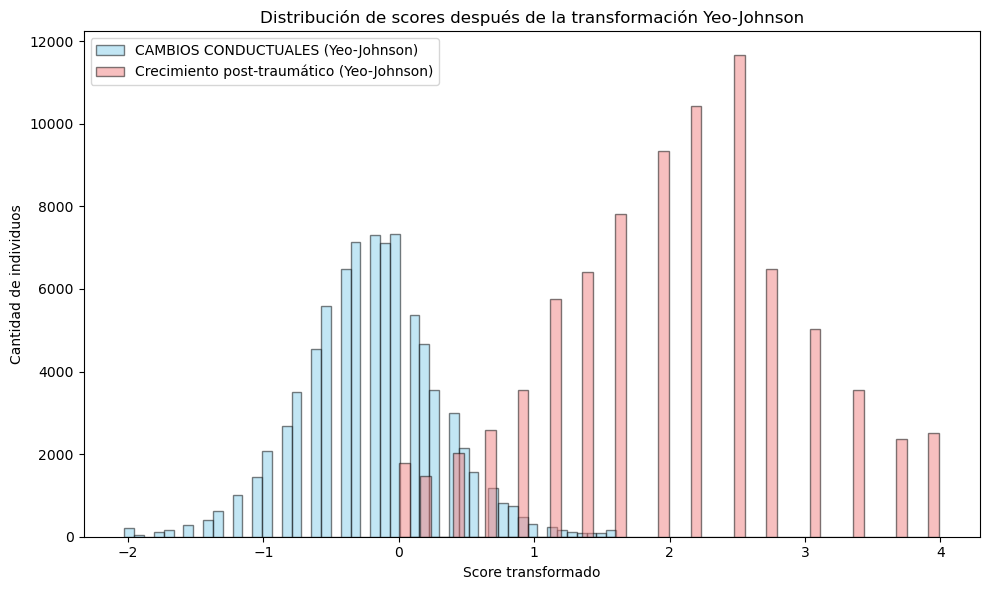

In [16]:
from scipy.stats import yeojohnson

# Aplicar la transformación Yeo-Johnson
df_label['score_life_change_YJ'],_ = yeojohnson(mean_life_change)
df_label['score_growth_YJ'],_ = yeojohnson(mean_growth)

# Crear la gráfica de distribución de ambos scores después de la transformación Yeo-Johnson
plt.figure(figsize=(10, 6))

# Distribución transformada de mean_life_change
plt.hist(df_label['score_life_change_YJ'], bins=50, color='skyblue', edgecolor='black', alpha=0.5, label='CAMBIOS CONDUCTUALES (Yeo-Johnson)')

# Distribución transformada de mean_growth

plt.hist(df_label['score_growth_YJ'], bins=50, color='lightcoral', edgecolor='black', alpha=0.5, label='Crecimiento post-traumático (Yeo-Johnson)')

plt.title('Distribución de scores después de la transformación Yeo-Johnson')
plt.xlabel('Score transformado')
plt.ylabel('Cantidad de individuos')
plt.legend()
plt.tight_layout()
plt.show()

In [17]:
df_label.head()

,Life_Change_1,Life_Change_2,Life_Change_3,Life_Change_4,Life_Change_5,Life_Change_6,Life_Change_7,Life_Change_8,Life_Change_9,Growth_1,...,Growth_5,score_life_change,score_growth,score_life_change_MinMax,score_growth_MinMax,SUMA,Label_1,Cluster_MinMax,score_life_change_YJ,score_growth_YJ
0,-2.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,1.0,3.0,...,3.0,2.0,14.0,0.111111,0.933333,1.044444,1,-1,0.196406,3.679164
1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,...,3.0,18.0,15.0,1.000000,1.000000,2.000000,1,-1,1.604606,3.991502
2,-1.0,0.0,2.0,0.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,...,3.0,0.0,11.0,0.000000,0.733333,0.733333,1,0,0.000000,2.775004
3,2.0,0.0,2.0,2.0,1.0,2.0,0.0,0.0,1.0,1.0,...,3.0,10.0,9.0,0.555556,0.600000,1.155556,1,-1,0.928615,2.201849
4,0.0,-1.0,2.0,0.0,0.0,2.0,2.0,1.0,1.0,1.0,...,3.0,7.0,12.0,0.388889,0.800000,1.188889,1,-1,0.662236,3.070707


C:\Users\Private Richi\AppData\Local\Temp\ipykernel_4068\2234490064.py:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_label['score_life_change_YJ'], label='KDE - CAMBIOS CONDUCTUALES', shade=True, color='skyblue')
C:\Users\Private Richi\AppData\Local\Temp\ipykernel_4068\2234490064.py:22: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_label['score_growth_YJ'], label='KDE - Crecimiento post-traumático', shade=True, color='lightcoral')


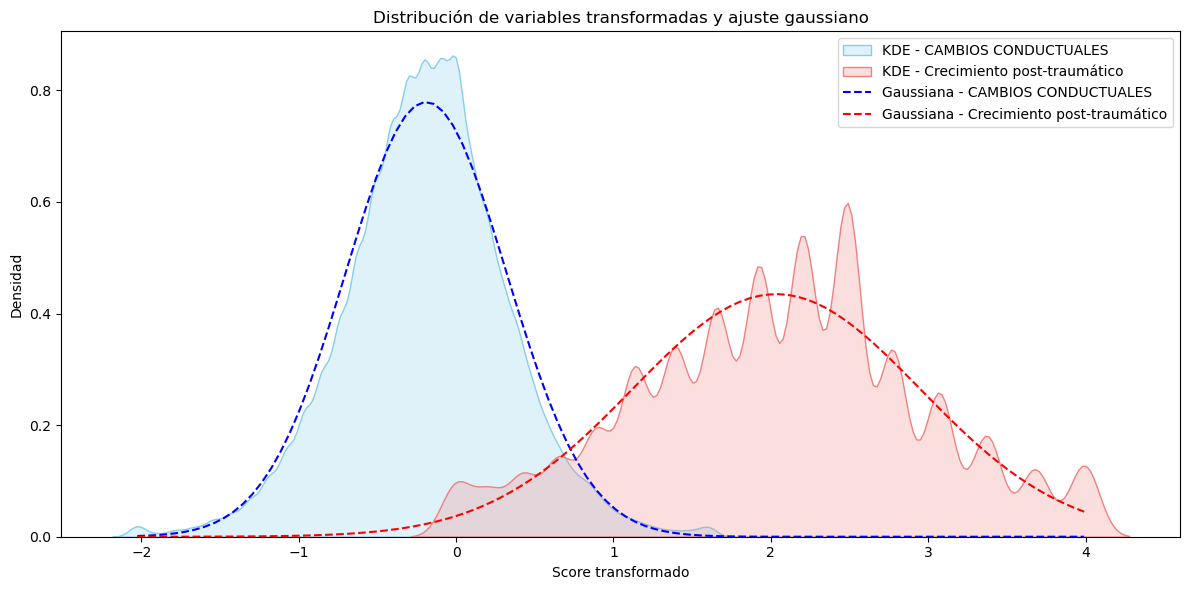

In [18]:
import seaborn as sns
import numpy as np
from scipy.stats import norm

# Estimar parámetros para la distribución gaussiana
mean_life_change_params = norm.fit(df_label['score_life_change_YJ'])
mean_growth_params = norm.fit(df_label['score_growth_YJ'])

# Crear nuevamente valores para el eje x
x_vals = np.linspace(min(df_label['score_life_change_YJ'].min(), df_label['score_growth_YJ'].min()),
                     max(df_label['score_life_change_YJ'].max(), df_label['score_growth_YJ'].max()), 100)

# Obtener nuevamente los valores de densidad de la distribución gaussiana
pdf_life_change = norm.pdf(x_vals, mean_life_change_params[0], mean_life_change_params[1])
pdf_growth = norm.pdf(x_vals, mean_growth_params[0], mean_growth_params[1])

# Crear nuevamente la gráfica superpuesta
plt.figure(figsize=(12, 6))

# Gráficas KDE para las variables transformadas
sns.kdeplot(df_label['score_life_change_YJ'], label='KDE - CAMBIOS CONDUCTUALES', shade=True, color='skyblue')
sns.kdeplot(df_label['score_growth_YJ'], label='KDE - Crecimiento post-traumático', shade=True, color='lightcoral')

# Gráficas de distribución gaussiana ajustada
plt.plot(x_vals, pdf_life_change, 'b--', label='Gaussiana - CAMBIOS CONDUCTUALES')
plt.plot(x_vals, pdf_growth, 'r--', label='Gaussiana - Crecimiento post-traumático')

plt.title('Distribución de variables transformadas y ajuste gaussiano')
plt.xlabel('Score transformado')
plt.ylabel('Densidad')
plt.legend()
plt.tight_layout()
plt.show()


C:\Users\Private Richi\anaconda3\envs\DL\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


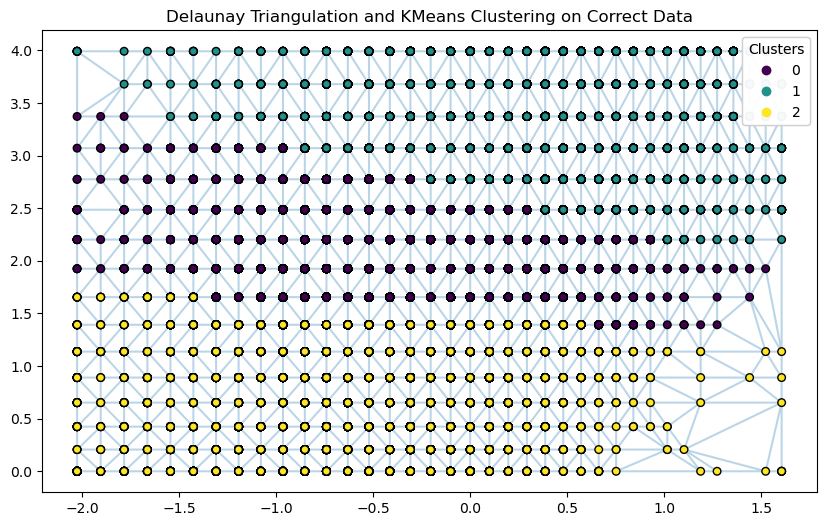

In [19]:
points_correct = df_label[['score_life_change_YJ', 'score_growth_YJ']].values

# Apply KMeans clustering
kmeans_correct = KMeans(n_clusters=3, random_state=0).fit(points_correct)
labels_correct = kmeans_correct.labels_

# Triangulation
tri_correct = Delaunay(points_correct)

# Plotting
plt.figure(figsize=(10, 6))
plt.triplot(points_correct[:, 0], points_correct[:, 1], tri_correct.simplices, alpha=0.3)

# Plot the points with color-coded cluster labels
scatter = plt.scatter(points_correct[:, 0], points_correct[:, 1], s=30, c=labels_correct, cmap='viridis', edgecolors='k')

# Add legend
legend1 = plt.legend(*scatter.legend_elements(), loc="upper right", title="Clusters")
plt.gca().add_artist(legend1)

plt.title('Delaunay Triangulation and KMeans Clustering on Correct Data')
plt.show()

In [20]:
cluster_map = {
    0: 1,
    1: -1,
    2: 0
}

# Utilizar el mapa para reemplazar los números de clusters por etiquetas
labels_correct = np.array([cluster_map[label] for label in labels_correct])
df_label['Cluster_YJ'] = labels_correct
df_label.head()

,Life_Change_1,Life_Change_2,Life_Change_3,Life_Change_4,Life_Change_5,Life_Change_6,Life_Change_7,Life_Change_8,Life_Change_9,Growth_1,...,score_life_change,score_growth,score_life_change_MinMax,score_growth_MinMax,SUMA,Label_1,Cluster_MinMax,score_life_change_YJ,score_growth_YJ,Cluster_YJ
0,-2.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,1.0,3.0,...,2.0,14.0,0.111111,0.933333,1.044444,1,-1,0.196406,3.679164,-1
1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,...,18.0,15.0,1.000000,1.000000,2.000000,1,-1,1.604606,3.991502,-1
2,-1.0,0.0,2.0,0.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,...,0.0,11.0,0.000000,0.733333,0.733333,1,0,0.000000,2.775004,-1
3,2.0,0.0,2.0,2.0,1.0,2.0,0.0,0.0,1.0,1.0,...,10.0,9.0,0.555556,0.600000,1.155556,1,-1,0.928615,2.201849,1
4,0.0,-1.0,2.0,0.0,0.0,2.0,2.0,1.0,1.0,1.0,...,7.0,12.0,0.388889,0.800000,1.188889,1,-1,0.662236,3.070707,-1


### Comparacion de cada etiquetado

In [21]:
# Establecer la semilla para reproducibilidad
np.random.seed(42)

# Seleccionar aleatoriamente 10 observaciones de cada clúster
selected_indices = []
for label in [-1,0,1]:
    cluster_group = df_label[df_label['Label_1'] == label]
    sampled_indices = cluster_group.sample(n=10).index.tolist()
    selected_indices.extend(sampled_indices)

# Mostrar los índices de las observaciones seleccionadas
print(selected_indices)


[32015, 27192, 48654, 62221, 65546, 37224, 2917, 33893, 20911, 24699, 44167, 41834, 7322, 42242, 72056, 54671, 39922, 59218, 36451, 53150, 16049, 6533, 44602, 31061, 32440, 39141, 14157, 41910, 8658, 76570]


In [22]:
# Crear un nuevo DataFrame con las observaciones seleccionadas
selected_data = df_label.loc[selected_indices]

# Mostrar el nuevo DataFrame
selected_data.iloc[:30, 14:]


,score_life_change,score_growth,score_life_change_MinMax,score_growth_MinMax,SUMA,Label_1,Cluster_MinMax,score_life_change_YJ,score_growth_YJ,Cluster_YJ
32015,-11.0,0.0,-0.611111,0.000000,-0.611111,-1,1,-1.193361,0.000000,0
27192,-7.0,1.0,-0.388889,0.066667,-0.322222,-1,1,-0.740560,0.206280,0
48654,-5.0,4.0,-0.277778,0.266667,-0.011111,-1,1,-0.521527,0.890485,0
62221,-10.0,4.0,-0.555556,0.266667,-0.288889,-1,1,-1.078452,0.890485,0
65546,-4.0,3.0,-0.222222,0.200000,-0.022222,-1,1,-0.414071,0.652550,0
37224,-10.0,4.0,-0.555556,0.266667,-0.288889,-1,1,-1.078452,0.890485,0
2917,-9.0,3.0,-0.500000,0.200000,-0.300000,-1,1,-0.964650,0.652550,0
33893,-6.0,2.0,-0.333333,0.133333,-0.200000,-1,1,-0.630381,0.424180,0
20911,-6.0,0.0,-0.333333,0.000000,-0.333333,-1,1,-0.630381,0.000000,0
24699,-6.0,0.0,-0.333333,0.000000,-0.333333,-1,1,-0.630381,0.000000,0


Cantidad de observaciones por clase para el etiquetado base
Label_1
 1    51150
 0    21059
-1    10567
Name: count, dtype: int64


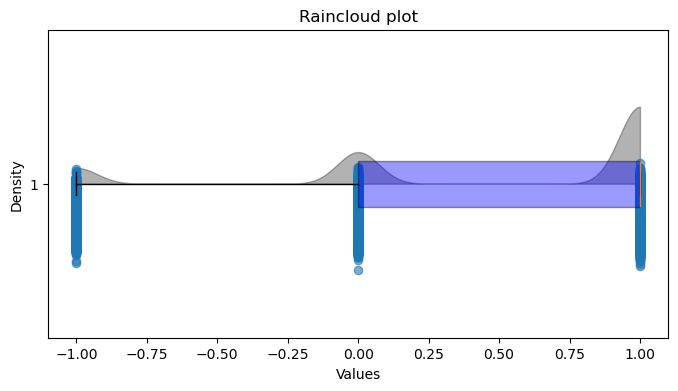

Cantidad de observaciones por clase para el etiquetado con cluster
Cluster_MinMax
 0    35440
 1    25928
-1    21408
Name: count, dtype: int64


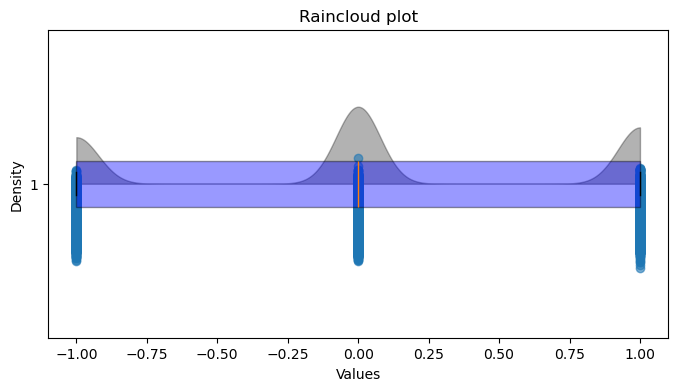

Cantidad de observaciones por clase para el etiquetado con cluster Yao Jhonson
Cluster_YJ
 1    39535
 0    23627
-1    19614
Name: count, dtype: int64


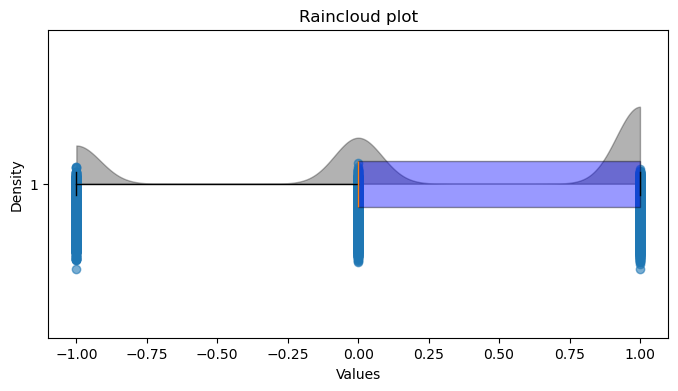

In [23]:
print('Cantidad de observaciones por clase para el etiquetado base')
print(df_label['Label_1'].value_counts())
fig, ax = plt.subplots(figsize=(8, 4))
data_x = df_label['Label_1']

# Create a list of colors for the boxplots based on the number of features you have
boxplots_colors = ['blue', 'red']

# Boxplot data
bp = ax.boxplot(data_x, patch_artist = True, vert = False)

# Change to the desired color and add transparency
for patch, color in zip(bp['boxes'], boxplots_colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.4)

# Create a list of colors for the violin plots based on the number of features you have
violin_colors = ['black', 'black']

# Violinplot data
vp = ax.violinplot(data_x, points=500,
               showmeans=False, showextrema=False, showmedians=False, vert=False)

for idx, b in enumerate(vp['bodies']):
    # Get the center of the plot
    m = np.mean(b.get_paths()[0].vertices[:, 0])
    # Modify it so we only see the upper half of the violin plot
    b.get_paths()[0].vertices[:, 1] = np.clip(b.get_paths()[0].vertices[:, 1], idx+1, idx+2)
    # Change to the desired color
    b.set_color(violin_colors[idx])

# Crear scatter plot horizontal
scatter_data = data_x
y = np.random.normal(1, 0.04, size=len(scatter_data)) - 0.1
plt.scatter(scatter_data, y, alpha=0.6)

# plt.yticks(np.arange(1,1,1), ['Feature 1', 'Feature 2'])  # Set text labels.
plt.xlabel('Values')
plt.ylabel('Density')
plt.title("Raincloud plot")
plt.show()

#####################################################################################
print('Cantidad de observaciones por clase para el etiquetado con cluster')
print(df_label['Cluster_MinMax'].value_counts())
fig, ax = plt.subplots(figsize=(8, 4))
data_x = df_label['Cluster_MinMax']

# Create a list of colors for the boxplots based on the number of features you have
boxplots_colors = ['blue', 'red']

# Boxplot data
bp = ax.boxplot(data_x, patch_artist = True, vert = False)

# Change to the desired color and add transparency
for patch, color in zip(bp['boxes'], boxplots_colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.4)

# Create a list of colors for the violin plots based on the number of features you have
violin_colors = ['black', 'black']

# Violinplot data
vp = ax.violinplot(data_x, points=500,
               showmeans=False, showextrema=False, showmedians=False, vert=False)

for idx, b in enumerate(vp['bodies']):
    # Get the center of the plot
    m = np.mean(b.get_paths()[0].vertices[:, 0])
    # Modify it so we only see the upper half of the violin plot
    b.get_paths()[0].vertices[:, 1] = np.clip(b.get_paths()[0].vertices[:, 1], idx+1, idx+2)
    # Change to the desired color
    b.set_color(violin_colors[idx])

# Crear scatter plot horizontal
scatter_data = data_x
y = np.random.normal(1, 0.04, size=len(scatter_data)) - 0.1
plt.scatter(scatter_data, y, alpha=0.6)

# plt.yticks(np.arange(1,1,1), ['Feature 1', 'Feature 2'])  # Set text labels.
plt.xlabel('Values')
plt.ylabel('Density')
plt.title("Raincloud plot")
plt.show()

#####################################################################################
print('Cantidad de observaciones por clase para el etiquetado con cluster Yao Jhonson')
print(df_label['Cluster_YJ'].value_counts())
fig, ax = plt.subplots(figsize=(8, 4))
data_x = df_label['Cluster_YJ']

# Create a list of colors for the boxplots based on the number of features you have
boxplots_colors = ['blue', 'red']

# Boxplot data
bp = ax.boxplot(data_x, patch_artist = True, vert = False)

# Change to the desired color and add transparency
for patch, color in zip(bp['boxes'], boxplots_colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.4)

# Create a list of colors for the violin plots based on the number of features you have
violin_colors = ['black', 'black']

# Violinplot data
vp = ax.violinplot(data_x, points=500,
               showmeans=False, showextrema=False, showmedians=False, vert=False)

for idx, b in enumerate(vp['bodies']):
    # Get the center of the plot
    m = np.mean(b.get_paths()[0].vertices[:, 0])
    # Modify it so we only see the upper half of the violin plot
    b.get_paths()[0].vertices[:, 1] = np.clip(b.get_paths()[0].vertices[:, 1], idx+1, idx+2)
    # Change to the desired color
    b.set_color(violin_colors[idx])

# Crear scatter plot horizontal
scatter_data = data_x
y = np.random.normal(1, 0.04, size=len(scatter_data)) - 0.1
plt.scatter(scatter_data, y, alpha=0.6)

# plt.yticks(np.arange(1,1,1), ['Feature 1', 'Feature 2'])  # Set text labels.
plt.xlabel('Values')
plt.ylabel('Density')
plt.title("Raincloud plot")
plt.show()



### Determinacion de la separabilidad con base a las respuestas y su respectiva etiqueta




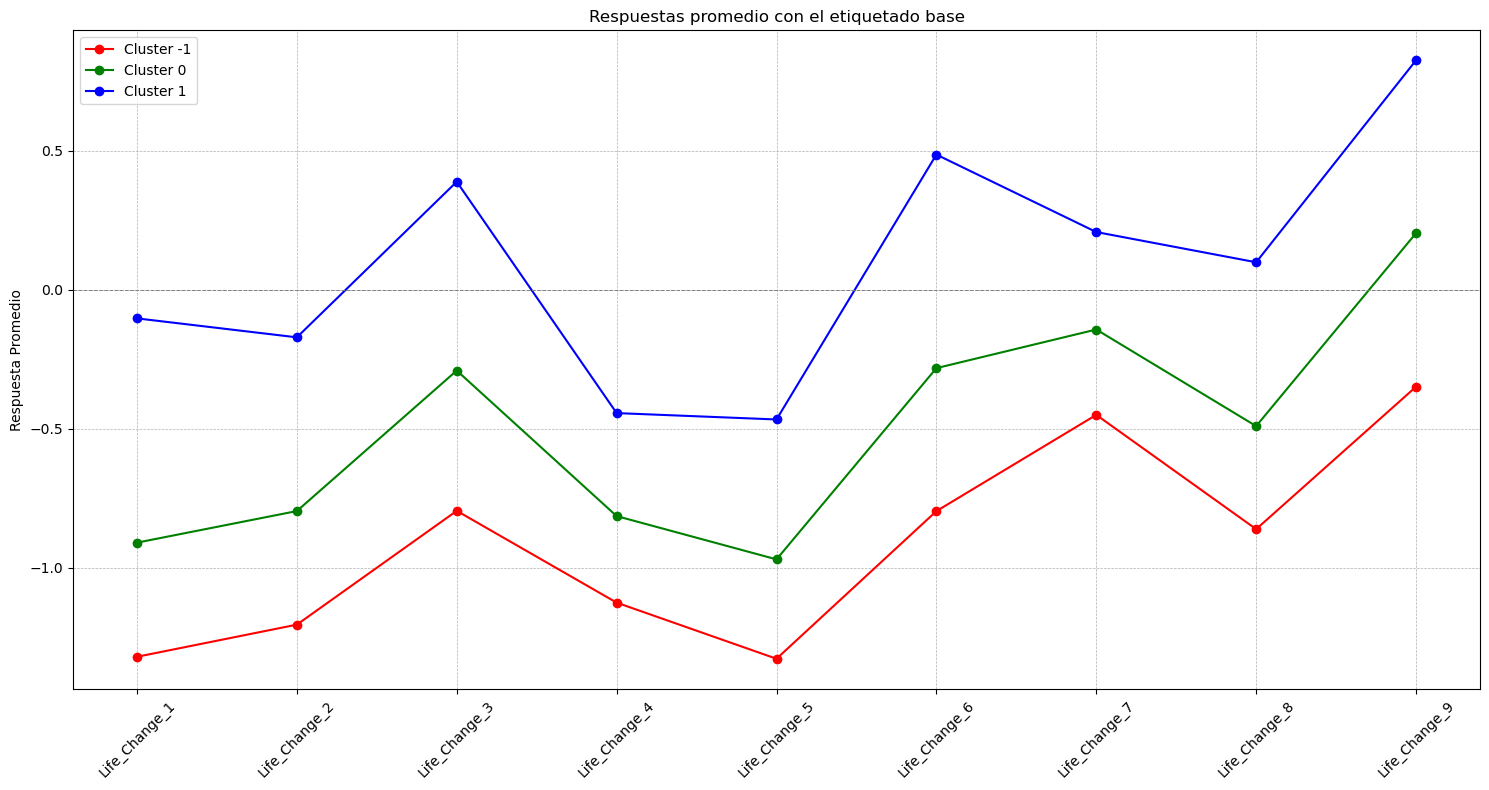

,Life_Change_1,Life_Change_2,Life_Change_3,Life_Change_4,Life_Change_5,Life_Change_6,Life_Change_7,Life_Change_8,Life_Change_9
Label_1,,,,,,,,,
-1,-1.320526,-1.204883,-0.795401,-1.125674,-1.327624,-0.796442,-0.450080,-0.861361,-0.348822
0,-0.909825,-0.796192,-0.290660,-0.814284,-0.970037,-0.281922,-0.142932,-0.490527,0.203808
1,-0.102913,-0.171105,0.388778,-0.443695,-0.466667,0.486432,0.207742,0.098964,0.825826


In [24]:
# ETIQUETADO BASE
# Calcular la media de las respuestas de las preguntas del primer bloque para cada clúster
cluster_means = df_label.groupby('Label_1')[['Life_Change_1', 'Life_Change_2', 'Life_Change_3', 'Life_Change_4',
                                         'Life_Change_5', 'Life_Change_6', 'Life_Change_7', 'Life_Change_8',
                                         'Life_Change_9']].mean()

# Visualizar las respuestas promedio para cada clúster en un gráfico
plt.figure(figsize=(15, 8))
for cluster, color in zip(cluster_means.index, ['red', 'green', 'blue']):
    plt.plot(cluster_means.columns, cluster_means.loc[cluster], color=color, marker='o', label=f'Cluster {cluster}')

plt.title('Respuestas promedio con el etiquetado base')
plt.xticks(rotation=45)
plt.ylabel('Respuesta Promedio')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.7)  # línea de referencia para el valor "igual"
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

cluster_means

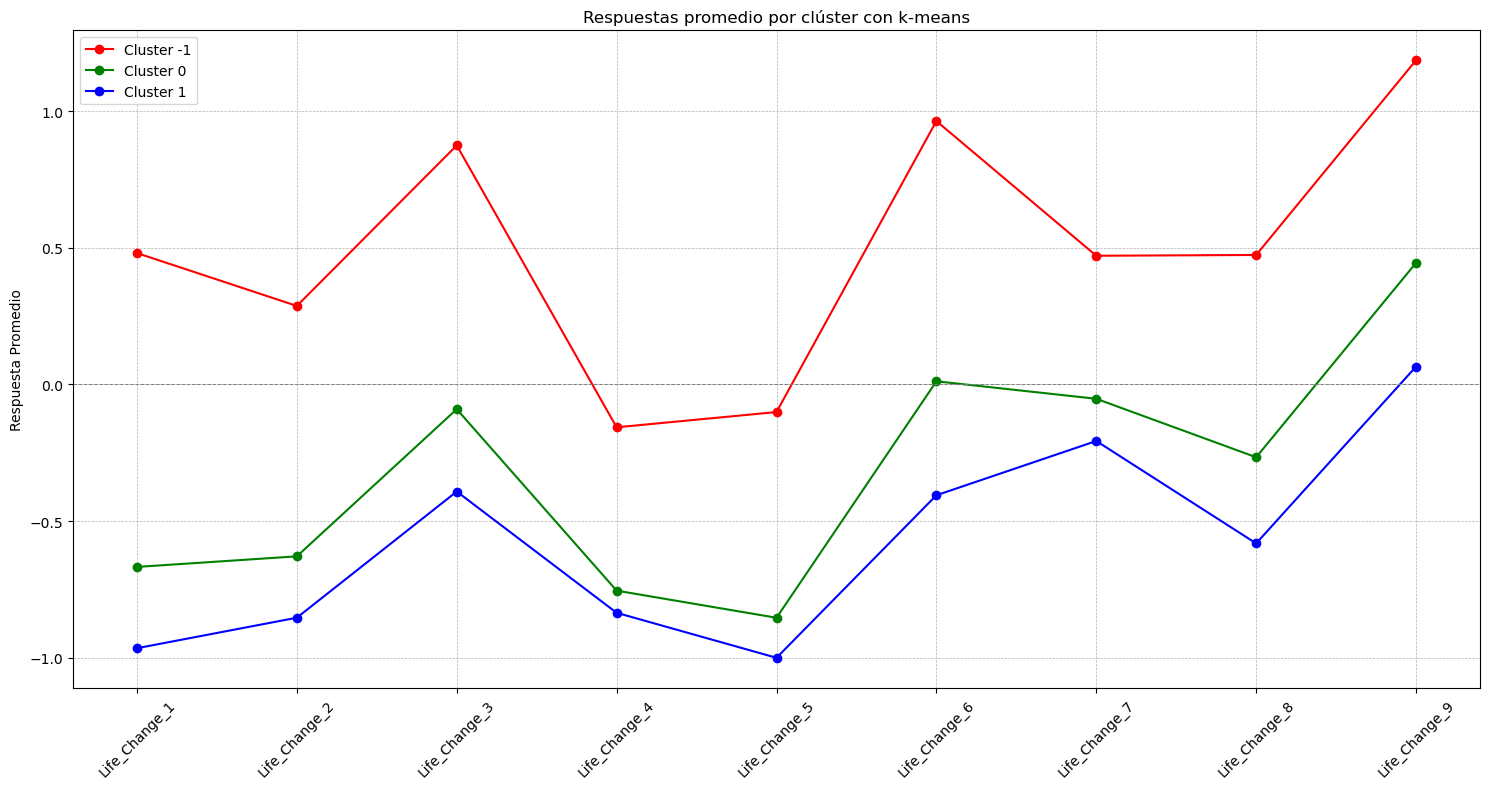

,Life_Change_1,Life_Change_2,Life_Change_3,Life_Change_4,Life_Change_5,Life_Change_6,Life_Change_7,Life_Change_8,Life_Change_9
Cluster_MinMax,,,,,,,,,
-1,0.480521,0.287229,0.874439,-0.156717,-0.100944,0.963472,0.470759,0.473608,1.185959
0,-0.667353,-0.628640,-0.090435,-0.754176,-0.853358,0.011541,-0.052370,-0.266225,0.444808
1,-0.964749,-0.853170,-0.391662,-0.835197,-0.999807,-0.405238,-0.206803,-0.581379,0.065335


In [25]:
# ETIQUETADO CON K MEANS MINMAX
# Calcular la media de las respuestas de las preguntas del primer bloque para cada clúster
cluster_means = df_label.groupby('Cluster_MinMax')[['Life_Change_1', 'Life_Change_2', 'Life_Change_3', 'Life_Change_4',
                                         'Life_Change_5', 'Life_Change_6', 'Life_Change_7', 'Life_Change_8',
                                         'Life_Change_9']].mean()

# Visualizar las respuestas promedio para cada clúster en un gráfico
plt.figure(figsize=(15, 8))
for cluster, color in zip(cluster_means.index, ['red', 'green', 'blue']):
    plt.plot(cluster_means.columns, cluster_means.loc[cluster], color=color, marker='o', label=f'Cluster {cluster}')

plt.title('Respuestas promedio por clúster con k-means')
plt.xticks(rotation=45)
plt.ylabel('Respuesta Promedio')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.7)  # línea de referencia para el valor "igual"
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

cluster_means

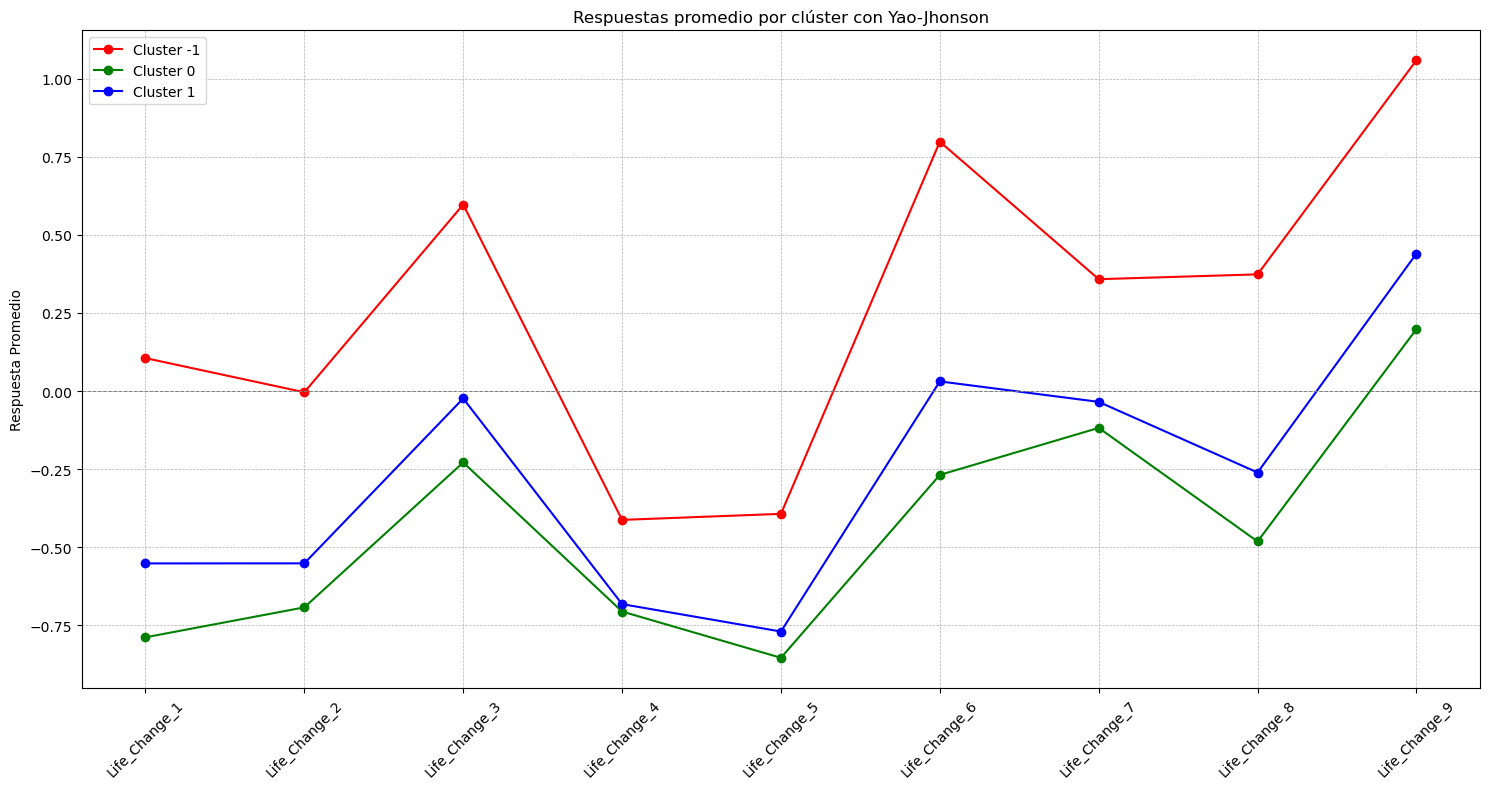

,Life_Change_1,Life_Change_2,Life_Change_3,Life_Change_4,Life_Change_5,Life_Change_6,Life_Change_7,Life_Change_8,Life_Change_9
Cluster_YJ,,,,,,,,,
-1,0.105333,-0.003977,0.596819,-0.412511,-0.393189,0.798205,0.357959,0.373407,1.058887
0,-0.788378,-0.692555,-0.228679,-0.705845,-0.853981,-0.268549,-0.118001,-0.481610,0.198163
1,-0.551840,-0.551663,-0.023852,-0.682180,-0.769900,0.030783,-0.034729,-0.260908,0.440015


In [26]:
# ETIQUETADO CON K MEANS Y YAO JHONSON
# Calcular la media de las respuestas de las preguntas del primer bloque para cada clúster
cluster_means = df_label.groupby('Cluster_YJ')[['Life_Change_1', 'Life_Change_2', 'Life_Change_3', 'Life_Change_4',
                                         'Life_Change_5', 'Life_Change_6', 'Life_Change_7', 'Life_Change_8',
                                         'Life_Change_9']].mean()

# Visualizar las respuestas promedio para cada clúster en un gráfico
plt.figure(figsize=(15, 8))
for cluster, color in zip(cluster_means.index, ['red', 'green', 'blue']):
    plt.plot(cluster_means.columns, cluster_means.loc[cluster], color=color, marker='o', label=f'Cluster {cluster}')

plt.title('Respuestas promedio por clúster con Yao-Jhonson')
plt.xticks(rotation=45)
plt.ylabel('Respuesta Promedio')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.7)  # línea de referencia para el valor "igual"
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

cluster_means

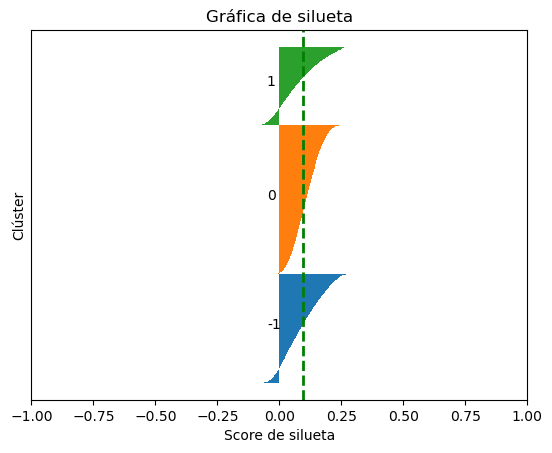

In [22]:
from sklearn.metrics import silhouette_samples, silhouette_score

# Calcula las puntuaciones de silueta para cada muestra
X = df.iloc[:, :14]
labels = df['Cluster_MinMax'].values
silhouette_vals = silhouette_samples(X, labels)

# Calcular las puntuaciones de silueta para cada muestra
silhouette_vals = silhouette_samples(X, labels)

# Configuración para la visualización
y_ticks = []
y_lower, y_upper = 0, 0
n_clusters = len(np.unique(labels))

# Iterar a través de todos los clústeres
for i, cluster in enumerate(np.unique(labels)):
    cluster_silhouette_vals = silhouette_vals[labels == cluster]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)

    plt.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
    plt.text(-0.05, y_lower + 0.5 * len(cluster_silhouette_vals), str(cluster))
    y_lower += len(cluster_silhouette_vals)

# Puntuación de silueta promedio
avg_score = np.mean(silhouette_vals)
plt.axvline(avg_score, linestyle='--', linewidth=2, color='green')

plt.yticks([])
plt.xlim([-1, 1])
plt.xlabel('Score de silueta')
plt.ylabel('Clúster')
plt.title('Gráfica de silueta')
plt.show()

In [ ]:
avg_score

In [3]:
df = pd.read_csv('PSY_COVID.csv')
df.head()

,Life_Change_1,Life_Change_2,Life_Change_3,Life_Change_4,Life_Change_5,Life_Change_6,Life_Change_7,Life_Change_8,Life_Change_9,Growth_1,...,score_life_change,score_growth,score_life_change_MinMax,score_growth_MinMax,SUMA,Label_1,Cluster_MinMax,score_life_change_YJ,score_growth_YJ,Cluster_YJ
0,-2.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,1.0,3.0,...,2.0,14.0,0.111111,0.933333,1.044444,1,1,0.196406,3.679164,1
1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,...,18.0,15.0,1.000000,1.000000,2.000000,1,1,1.604606,3.991502,1
2,-1.0,0.0,2.0,0.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,...,0.0,11.0,0.000000,0.733333,0.733333,1,0,0.000000,2.775004,1
3,2.0,0.0,2.0,2.0,1.0,2.0,0.0,0.0,1.0,1.0,...,10.0,9.0,0.555556,0.600000,1.155556,1,1,0.928615,2.201849,0
4,0.0,-1.0,2.0,0.0,0.0,2.0,2.0,1.0,1.0,1.0,...,7.0,12.0,0.388889,0.800000,1.188889,1,1,0.662236,3.070707,1


In [4]:
X = df.iloc[:,16 :18]
X.head()

,score_life_change_MinMax,score_growth_MinMax
0,0.111111,0.933333
1,1.000000,1.000000
2,0.000000,0.733333
3,0.555556,0.600000
4,0.388889,0.800000


In [ ]:
from sklearn.cluster import SpectralClustering

sc = SpectralClustering(n_clusters=3, assign_labels='kmeans', affinity='nearest_neighbors', n_neighbors=10, n_jobs=-1)
labels = sc.fit_predict(X)

In [ ]:
plt.scatter(X['score_life_change_MinMax'], X['score_growth_MinMax'], c=labels, cmap='viridis', edgecolors='k')
plt.title('Spectral Clustering')
plt.xlabel('Life Change Score MinMax')
plt.ylabel('Growth Score MinMax')
plt.show()

In [5]:
from sklearn.cluster import Birch

b = Birch(n_clusters = 3, threshold=0.33)
labels = b.fit_predict(X)

In [6]:
df = pd.read_csv('PSY_COVID.csv')
df['Birch'] = pd.DataFrame(labels)
df.head()

,Life_Change_1,Life_Change_2,Life_Change_3,Life_Change_4,Life_Change_5,Life_Change_6,Life_Change_7,Life_Change_8,Life_Change_9,Growth_1,...,score_growth,score_life_change_MinMax,score_growth_MinMax,SUMA,Label_1,Cluster_MinMax,score_life_change_YJ,score_growth_YJ,Cluster_YJ,Birch
0,-2.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,1.0,3.0,...,14.0,0.111111,0.933333,1.044444,1,1,0.196406,3.679164,1,1
1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,...,15.0,1.000000,1.000000,2.000000,1,1,1.604606,3.991502,1,1
2,-1.0,0.0,2.0,0.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,...,11.0,0.000000,0.733333,0.733333,1,0,0.000000,2.775004,1,2
3,2.0,0.0,2.0,2.0,1.0,2.0,0.0,0.0,1.0,1.0,...,9.0,0.555556,0.600000,1.155556,1,1,0.928615,2.201849,0,1
4,0.0,-1.0,2.0,0.0,0.0,2.0,2.0,1.0,1.0,1.0,...,12.0,0.388889,0.800000,1.188889,1,1,0.662236,3.070707,1,1


In [7]:
X.head()

,score_life_change_MinMax,score_growth_MinMax
0,0.111111,0.933333
1,1.000000,1.000000
2,0.000000,0.733333
3,0.555556,0.600000
4,0.388889,0.800000


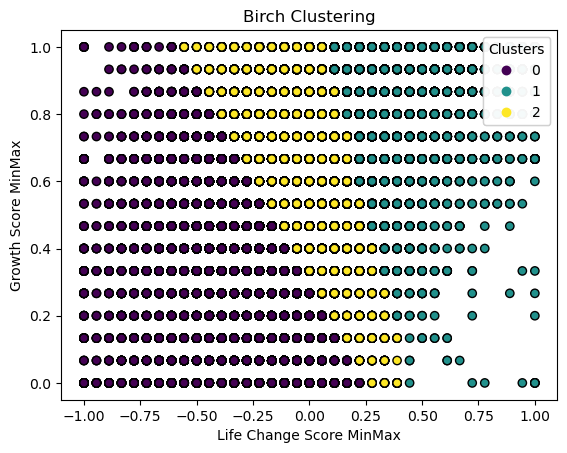

In [13]:
n_clusters = len(np.unique(labels))  # Número de clusters únicos

# Crear el gráfico de dispersión
fig, ax = plt.subplots()
scatter = ax.scatter(X['score_life_change_MinMax'], X['score_growth_MinMax'], c=labels, cmap='viridis', edgecolors='k')

# Título y etiquetas de los ejes
plt.title('Birch Clustering')
plt.xlabel('Life Change Score MinMax')
plt.ylabel('Growth Score MinMax')

# Crear una leyenda para los clusters
# Aquí usamos 'scatter.legend_elements()' para obtener automáticamente los colores y etiquetas
legend1 = ax.legend(*scatter.legend_elements(), loc="upper right", title="Clusters")
ax.add_artist(legend1)

# Mostrar el gráfico
plt.show()

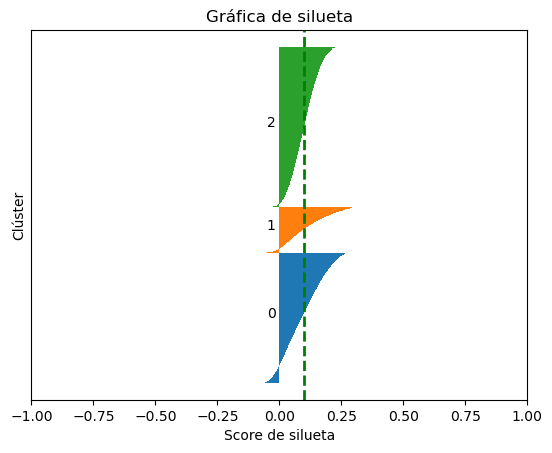

In [15]:
from sklearn.metrics import silhouette_samples, silhouette_score

# Calcula las puntuaciones de silueta para cada muestra
X = df.iloc[:, :14]
labels = df['Birch'].values
silhouette_vals = silhouette_samples(X, labels)

# Calcular las puntuaciones de silueta para cada muestra
silhouette_vals = silhouette_samples(X, labels)

# Configuración para la visualización
y_ticks = []
y_lower, y_upper = 0, 0
n_clusters = len(np.unique(labels))

# Iterar a través de todos los clústeres
for i, cluster in enumerate(np.unique(labels)):
    cluster_silhouette_vals = silhouette_vals[labels == cluster]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)

    plt.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
    plt.text(-0.05, y_lower + 0.5 * len(cluster_silhouette_vals), str(cluster))
    y_lower += len(cluster_silhouette_vals)

# Puntuación de silueta promedio
avg_score = np.mean(silhouette_vals)
plt.axvline(avg_score, linestyle='--', linewidth=2, color='green')

plt.yticks([])
plt.xlim([-1, 1])
plt.xlabel('Score de silueta')
plt.ylabel('Clúster')
plt.title('Gráfica de silueta')
plt.show()

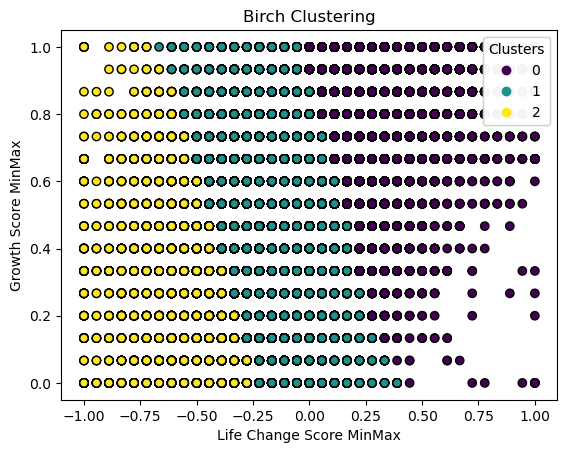

In [19]:
df = pd.read_csv('PSY_COVID.csv')
X = df.iloc[:,16 :18]
b_2 = Birch(n_clusters = 3, threshold=0.3)
labels_2 = b_2.fit_predict(X)
df['Birch'] = pd.DataFrame(labels_2)

n_clusters = len(np.unique(labels_2))  # Número de clusters únicos

# Crear el gráfico de dispersión
fig, ax = plt.subplots()
scatter = ax.scatter(X['score_life_change_MinMax'], X['score_growth_MinMax'], c=labels_2, cmap='viridis', edgecolors='k')

# Título y etiquetas de los ejes
plt.title('Birch Clustering')
plt.xlabel('Life Change Score MinMax')
plt.ylabel('Growth Score MinMax')

# Crear una leyenda para los clusters
# Aquí usamos 'scatter.legend_elements()' para obtener automáticamente los colores y etiquetas
legend1 = ax.legend(*scatter.legend_elements(), loc="upper right", title="Clusters")
ax.add_artist(legend1)

# Mostrar el gráfico
plt.show()

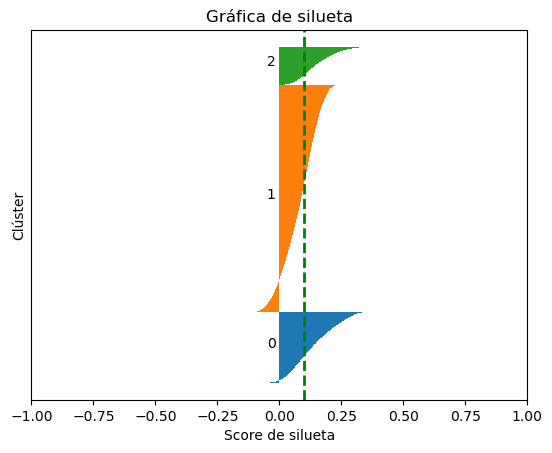

In [20]:
# Calcula las puntuaciones de silueta para cada muestra
X = df.iloc[:, :14]
labels = df['Birch'].values
silhouette_vals = silhouette_samples(X, labels)

# Calcular las puntuaciones de silueta para cada muestra
silhouette_vals = silhouette_samples(X, labels)

# Configuración para la visualización
y_ticks = []
y_lower, y_upper = 0, 0
n_clusters = len(np.unique(labels))

# Iterar a través de todos los clústeres
for i, cluster in enumerate(np.unique(labels)):
    cluster_silhouette_vals = silhouette_vals[labels == cluster]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)

    plt.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
    plt.text(-0.05, y_lower + 0.5 * len(cluster_silhouette_vals), str(cluster))
    y_lower += len(cluster_silhouette_vals)

# Puntuación de silueta promedio
avg_score = np.mean(silhouette_vals)
plt.axvline(avg_score, linestyle='--', linewidth=2, color='green')

plt.yticks([])
plt.xlim([-1, 1])
plt.xlabel('Score de silueta')
plt.ylabel('Clúster')
plt.title('Gráfica de silueta')
plt.show()

### Realizacion de la codificacion de variables categoricas

In [ ]:
# Training
encoder = TargetEncoder(cols=['Node','Gender','Covid_Others','Cluster_1','Cluster_2','Cluster_3','Cluster_4','Cluster_5','Amenit_1','Amenit_2'])
encoder.fit(df,result_df)
#Utiliza el mismo encoder para transformar el dataset de testing y el de testing?
df_enc = encoder.transform(df)
print(df_enc.info())
df_enc.head()

### Feature selection

In [ ]:
from sklearn.feature_selection import SelectKBest
bestfeatures = SelectKBest(k='all')
fit = bestfeatures.fit(df_enc, result_df)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(df_enc.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
print(featureScores.nlargest(125,'Score'))

In [ ]:
bestfeatures = SelectKBest(k='all')

fit = bestfeatures.fit(df_enc.drop(['Life_Change_1','Life_Change_2','Life_Change_3','Life_Change_4','Life_Change_5','Life_Change_6','Life_Change_7','Life_Change_8','Life_Change_9'],axis=1), result_df)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(df_enc.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
print(featureScores.nlargest(125,'Score'))

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

# Preparación de datos
new_df = df_enc.drop(['Life_Change_1','Life_Change_2','Life_Change_3','Life_Change_4','Life_Change_5','Life_Change_6','Life_Change_7','Life_Change_8','Life_Change_9'], axis=1)

# Entrenar el modelo
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(new_df, result_df)

# Obtener columnas importantes y sus coeficientes
coef = lsvc.coef_.ravel() * 100  # Multiplicamos por 100
important_columns = new_df.columns[coef != 0]
important_scores = coef[coef != 0]

# Ordenamos las características y sus coeficientes de mayor a menor importancia
sorted_indices = np.argsort(np.abs(important_scores))[::-1]  # Obtenemos los índices ordenados por valor absoluto
important_columns_sorted = important_columns[sorted_indices]
important_scores_sorted = important_scores[sorted_indices]

# Imprimir las columnas importantes y sus scores
for col, score, i in zip(important_columns_sorted, important_scores_sorted, sorted_indices):
    print(f"{i}      {col} Score: {score}")


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Inicializar el clasificador de bosque aleatorio
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(new_df, result_df)

# Obtener importancias de características
feature_importances = clf.feature_importances_ * 100

# Ordenar las características y sus importancias de mayor a menor importancia
sorted_indices = np.argsort(feature_importances)[::-1]
columns_sorted = new_df.columns[sorted_indices]
importances_sorted = feature_importances[sorted_indices]

# Imprimir las columnas importantes y sus importancias
for col, imp, i in zip(columns_sorted, importances_sorted, sorted_indices):
    print(f"{i}      {col},  Importance: {imp:.2f}%")

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

# Entrenar el modelo ExtraTreesClassifier
clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(new_df, result_df)

# Obtener la importancia de las características
feature_importances = clf.feature_importances_ * 100  # Multiplicamos por 100

# Ordenamos las características y sus importancias de mayor a menor
sorted_indices = np.argsort(feature_importances)[::-1]
important_columns_sorted = new_df.columns[sorted_indices]
important_importances_sorted = feature_importances[sorted_indices]

# Imprimir las columnas importantes y sus importancias
for col, imp, i in zip(important_columns_sorted, important_importances_sorted, sorted_indices):
    print(f"{i}      {col},   Importance: {imp}")

In [ ]:
# Usamos ExtraTreesClassifier como un modelo base para SelectFromModel
clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(new_df, result_df)

# Usamos SelectFromModel para obtener las características importantes
sfm = SelectFromModel(clf, prefit=True)
selected_features = new_df.columns[sfm.get_support()]

# Extraemos las importancias de las características seleccionadas y las ordenamos
selected_importances = clf.feature_importances_[sfm.get_support()] * 100
sorted_indices = np.argsort(selected_importances)[::-1]
important_columns_sorted_integrated = selected_features[sorted_indices]
important_importances_sorted_integrated = selected_importances[sorted_indices]

# Imprimir las columnas importantes y sus importancias
for col, imp, i in zip(important_columns_sorted_integrated, important_importances_sorted_integrated, sorted_indices):
    print(f"{i}    {col},   Importance: {imp}")


In [ ]:
# from sklearn.feature_selection import SelectKBest
# #apply SelectKBest class to show the highest features' scores
# bestfeatures = SelectKBest(k='all')
# fit = bestfeatures.fit(df_X_train_stand, y_train)
# dfscores = pd.DataFrame(fit.scores_)
# dfcolumns = pd.DataFrame(df_X_train_stand.columns)
# #concat two dataframes for better visualization
# featureScores = pd.concat([dfcolumns,dfscores],axis=1)
# featureScores.columns = ['Specs','Score']  #naming the dataframe columns
# print(featureScores.nlargest(17,'Score'))  #sort best features